Week 1 Code Sample Assignment
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [1]:



import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [41]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 5
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (5678, 9999),
    '1-30 Days': (48292, 60000),
    '31-60 Days': (6570, 7900),
    '61-90 Days': (1000, 4500),
    '91-120 Days': (50925, 89030),
    '121-365': (10, 20),
    'Over 365 Days': (1000, 4739),
    'Unapplied Payments': (-7000, -6000),
    # the are the number of invoices per bucket
    '# of Invoices': (500, 15040)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,7296.39,50118.38,6597.38,1641.92,74239.65,17.85,3271.61,-6191.60,10170,143183.18,136991.58
1,Unit 2,9786.04,48972.04,7859.98,2064.85,56240.41,12.00,1637.59,-6695.39,11248,126572.91,119877.52
2,Unit 3,8840.95,58433.19,7677.15,2836.65,62057.17,15.14,1243.23,-6902.33,1275,141103.48,134201.15
3,Unit 4,8264.80,55329.85,6852.41,2511.81,64885.22,15.92,4547.88,-6315.77,12706,142407.89,136092.12
4,Unit 5,6352.16,56582.11,6811.83,2019.30,68303.55,10.46,4610.50,-6559.85,8726,144689.91,138130.06


In [43]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.05  # 5% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calcualte the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,143183.18,124879.197742
1,Unit 2,126572.91,112296.705753
2,Unit 3,141103.48,125486.835857
3,Unit 4,142407.89,124626.773455
4,Unit 5,144689.91,126279.099026


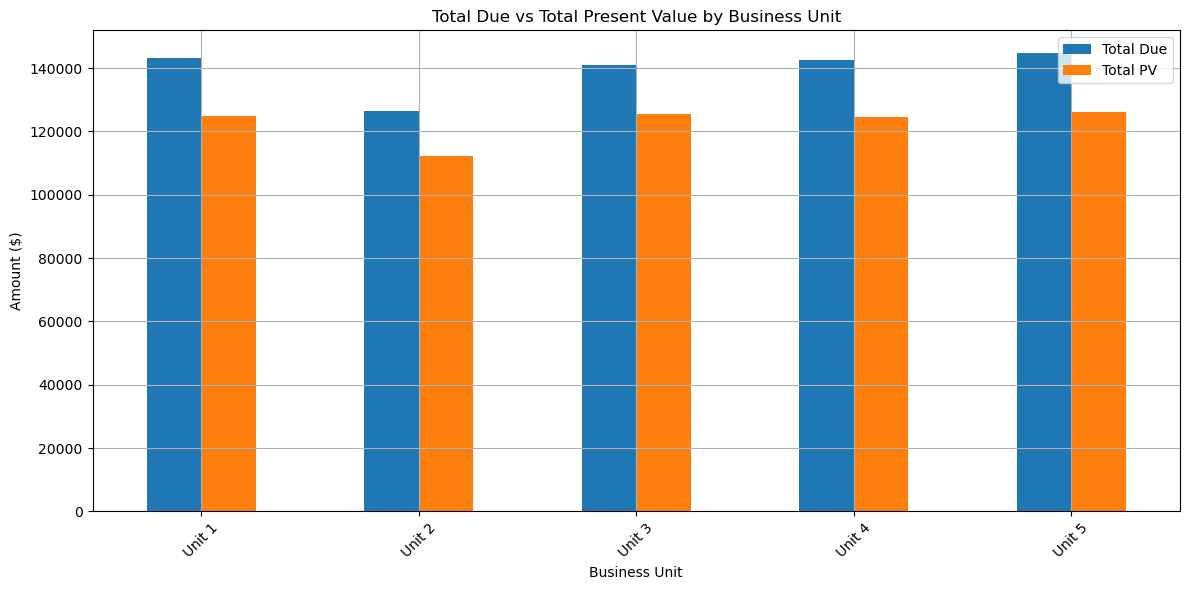

In [45]:
# lets plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()